# Imports

In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt
import csv

# Task 1

## Input data

In [3]:
# Distributions
pxy1 = lambda x : 1 / (math.pi * (1 + x**2))  # Cauchy(0, 1)
pxy2 = lambda x : 1 / 3 if 0. <= x <= 3. else 0.  # U(0, 3)

# Loss function scales
l1, l2 = 2, 1

# A priori probs
py1, py2 = 0.4, 0.6

In [4]:
def plotPiecewise(x, dist, color):
    # Vectorize distribution
    dist_ = np.vectorize(dist)(x)

    # Plot distribution iteratively
    k = 0
    for i in range(1, len(x)):
        if not math.isclose(dist_[i], dist_[i - 1]):
            # Plot connected segments
            plt.plot(x[k : i], dist_[k : i], color + '-')

            # Plot jump
            plt.plot(x[i - 1 : i + 1], dist_[i - 1 : i + 1], color + '--')

            # Update starting index
            k = i

    # Plot last segments
    plt.plot(x[k:], dist_[k:], color + '-')

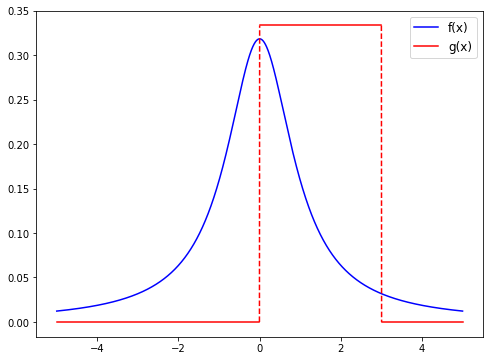

In [5]:
# Plot initial distributions
plt.figure(figsize=(8, 6))
x = np.linspace(-5, 5, 2001)
plt.plot(x, pxy1(x), 'b')
plotPiecewise(x, pxy2, 'r')
plt.legend(['f(x)', 'g(x)'], fontsize='large')

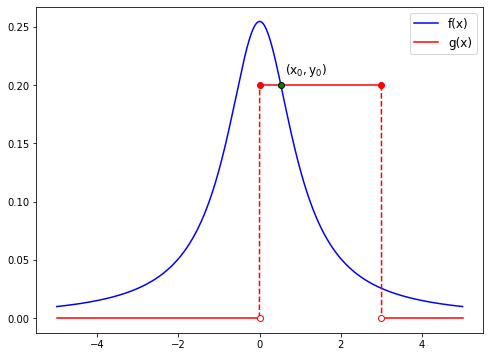

In [6]:
# Scaled distributions
f = lambda x : l1 * py1 * pxy1(x)
g = lambda x : l2 * py2 * pxy2(x)

# Plot distributions
plt.figure(figsize=(8, 6))
x = np.linspace(-5, 5, 2001)
plt.plot(x, f(x), 'b')
plotPiecewise(x, g, 'r')
plt.legend(['f(x)', 'g(x)'], fontsize='large')

# Plot jump points
incl = dict(marker='o', mfc='r', mec='r')
excl = dict(marker='o', mfc='w', mec='r')
plt.plot(0, 0, **excl)
plt.plot(0, 0.2, **incl)
plt.plot(3, 0.2, **incl)
plt.plot(3, 0, **excl)

# Plot intersection point
x = math.sqrt(4 / math.pi - 1)
y = f(x)
plt.plot(x, y, marker='o', mfc='g', mec='k')

# Plot label
plt.text(x + 0.1, y + 0.01, '$\mathregular{(x_0, y_0)}$', fontsize='large')

plt.savefig("tex/materials/distribs.pdf")

## 1. Find an optimal Bayes classifier

In [7]:
def a1(x):
    return 1 if math.sqrt(4 / math.pi - 1) <= x <= 3 else -1

## 2. Evaluate a mean risk

In [8]:
def R():
    return 0.299958

# Task 2

## Input data

In [19]:
# Import .csv
x1, x2, y = [], [], []
with open("input/task2.csv", newline='') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    next(reader)  # Skip first row
    for row in reader:
        x1.append(float(row[0]))
        x2.append(float(row[1]))
        y.append(int(row[2]))

x1 = np.array(x1)
x2 = np.array(x2)
y = np.array(y, dtype='i')

# Split by class
k = np.argwhere(np.diff(y)).flatten()[0] + 1

x11, x12 = tuple(np.split(x1, [k]))
x21, x22 = tuple(np.split(x2, [k]))

In [29]:
n = len(y)
mu = lambda x : np.mean(x)
sigma = lambda x, mu : 1 / (len(x) - 1) * np.sum((x - mu)**2)
gauss = lambda x, mu, sigma: 1 / (sigma * math.sqrt(2 * math.pi)) * np.exp(-1/2 * ((x - mu) / sigma)**2)

# Compute a priori probabilities
# c1 = np.count_nonzero(x1 == -1)
c1 = k
c2 = n - c1
py1_, py2_ = c1 / n, c2 / n
print(py1_, py2_)

# Find normal distrib params
mu11, mu12 = mu(x11), mu(x12)
mu21, mu22 = mu(x21), mu(x22)

sigma11, sigma12 = sigma(x11, mu11), sigma(x12, mu12)
sigma21, sigma22 = sigma(x21, mu21), sigma(x22, mu22)

# Setup distributions
px1y1 = lambda x : gauss(x, mu11, sigma11)
px1y2 = lambda x : gauss(x, mu12, sigma12)
px2y1 = lambda x : gauss(x, mu21, sigma21)
px2y2 = lambda x : gauss(x, mu22, sigma22)

pxy1_ = lambda x : px1y1(x) * px2y1(x)
pxy2_ = lambda x : px1y2(x) * px2y2(x)

0.4 0.6


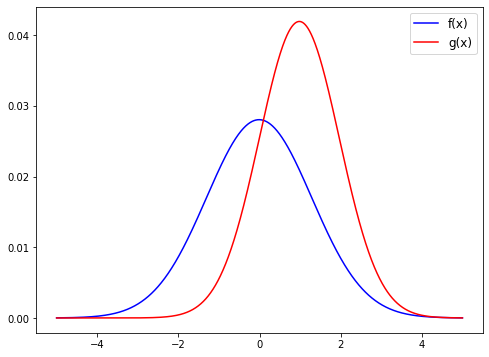

In [27]:
# Plot initial distributions
plt.figure(figsize=(8, 6))
x = np.linspace(-5, 5, 2001)
plt.plot(x, pxy1_(x), 'b')
plt.plot(x, pxy2_(x), 'r')
plt.legend(['f(x)', 'g(x)'], fontsize='large')

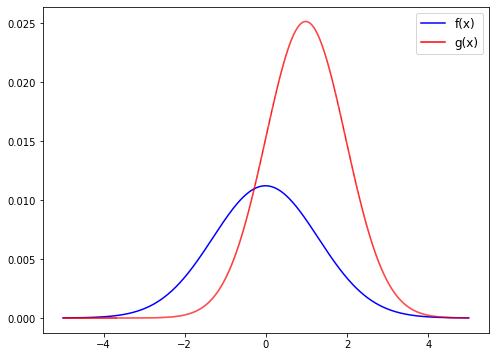

In [28]:
# Scaled distributions
f_ = lambda x : py1_ * pxy1_(x)
g_ = lambda x : py2_ * pxy2_(x)

# Plot distributions
plt.figure(figsize=(8, 6))
x = np.linspace(-5, 5, 2001)
plt.plot(x, f_(x), 'b')
plotPiecewise(x, g_, 'r')
plt.legend(['f(x)', 'g(x)'], fontsize='large')

## 3. Find an optimal naive Bayes classifier